In [1]:
from fastai.text import *
import matplotlib.pyplot as plt
from statistics import mean, median, mode

In [2]:
df_train = pd.read_csv('../train/sofmattress_train.csv')
df_train.head()

,sentence,label,answer
0,You guys provide EMI option?,EMI,Here are some of the *EMI* options for you
1,Do you offer Zero Percent EMI payment options?,EMI,Here are some of the *EMI* options for you
2,0% EMI.,EMI,Here are some of the *EMI* options for you
3,EMI,EMI,Here are some of the *EMI* options for you
4,I want in installment,EMI,Here are some of the *EMI* options for you


In [3]:
df_train.shape

(328, 3)

In [4]:
df_test = pd.read_csv('../test/sofmattress_test.csv')
df_test.head()

,sentence,label
0,There are only 2 models,NO_NODES_DETECTED
1,Single,NO_NODES_DETECTED
2,What's difference between ergo and ortho,COMPARISON
3,Return order,RETURN_EXCHANGE
4,Hai not recieved my product,DELAY_IN_DELIVERY


In [5]:
df_test.shape

(397, 2)

In [6]:
# No. of Inscope queries, No. of OOS queries
print('Inscope queries in Test set: ', df_test[df_test['label']!='NO_NODES_DETECTED'].shape[0])
print('OOS queries in Test set: ', df_test[df_test['label']=='NO_NODES_DETECTED'].shape[0])

Inscope queries in Test set:  231
OOS queries in Test set:  166


In [7]:
# No of classes
print('No of classes: ', len(set(df_train['label'])))

No of classes:  21


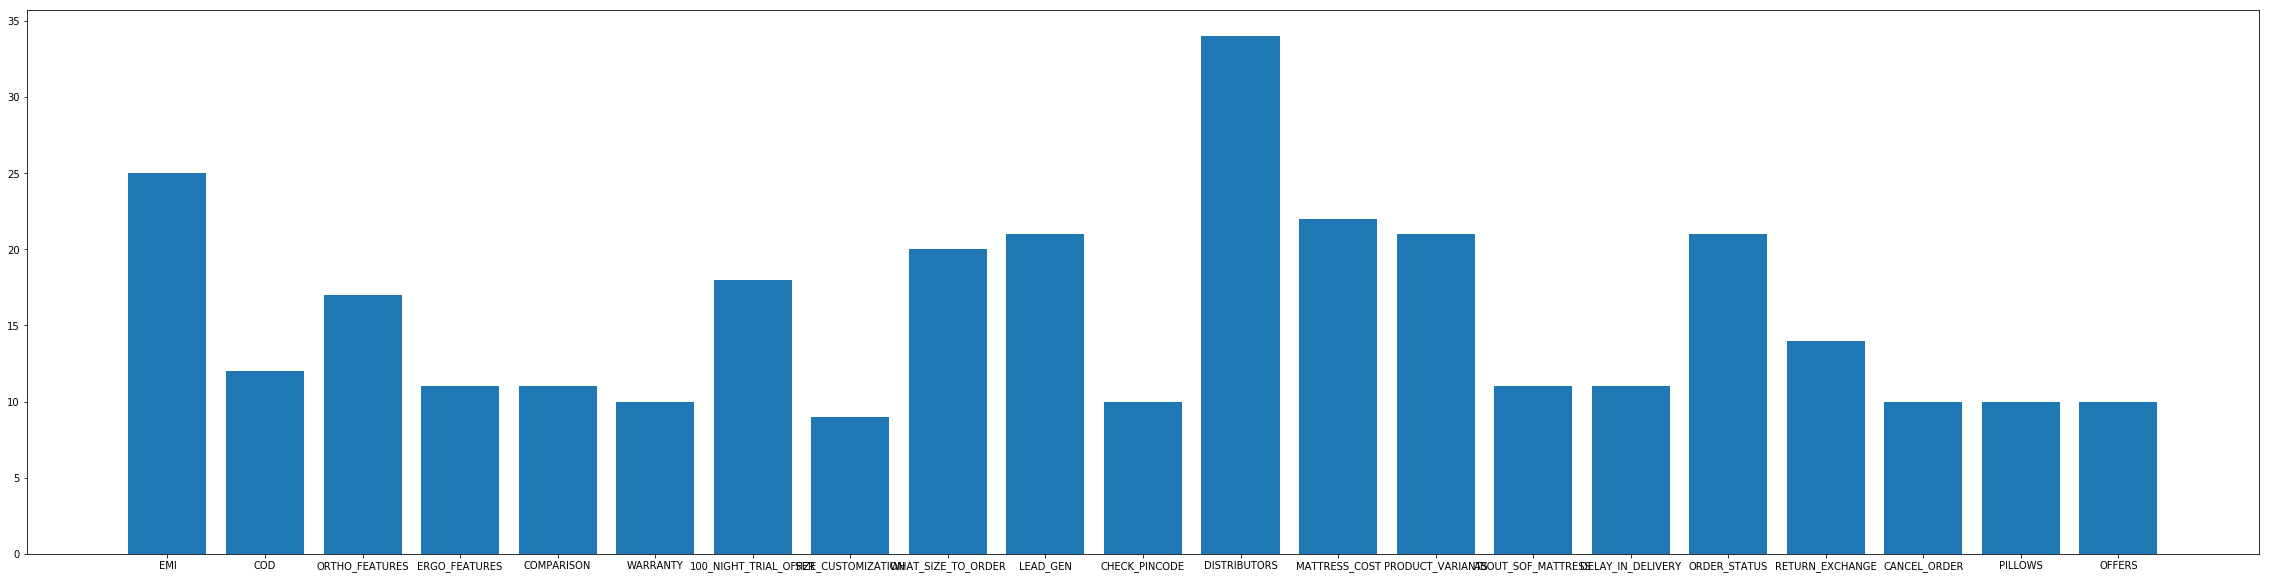

In [8]:
# Class distribution in training set
D = Counter(df_train['label'])
plt.rcParams["figure.figsize"] = (40,10)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [9]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  9
Max no. of sentences:  34
Avg no. of sentences:  15.619047619047619
Median of sentences:  12


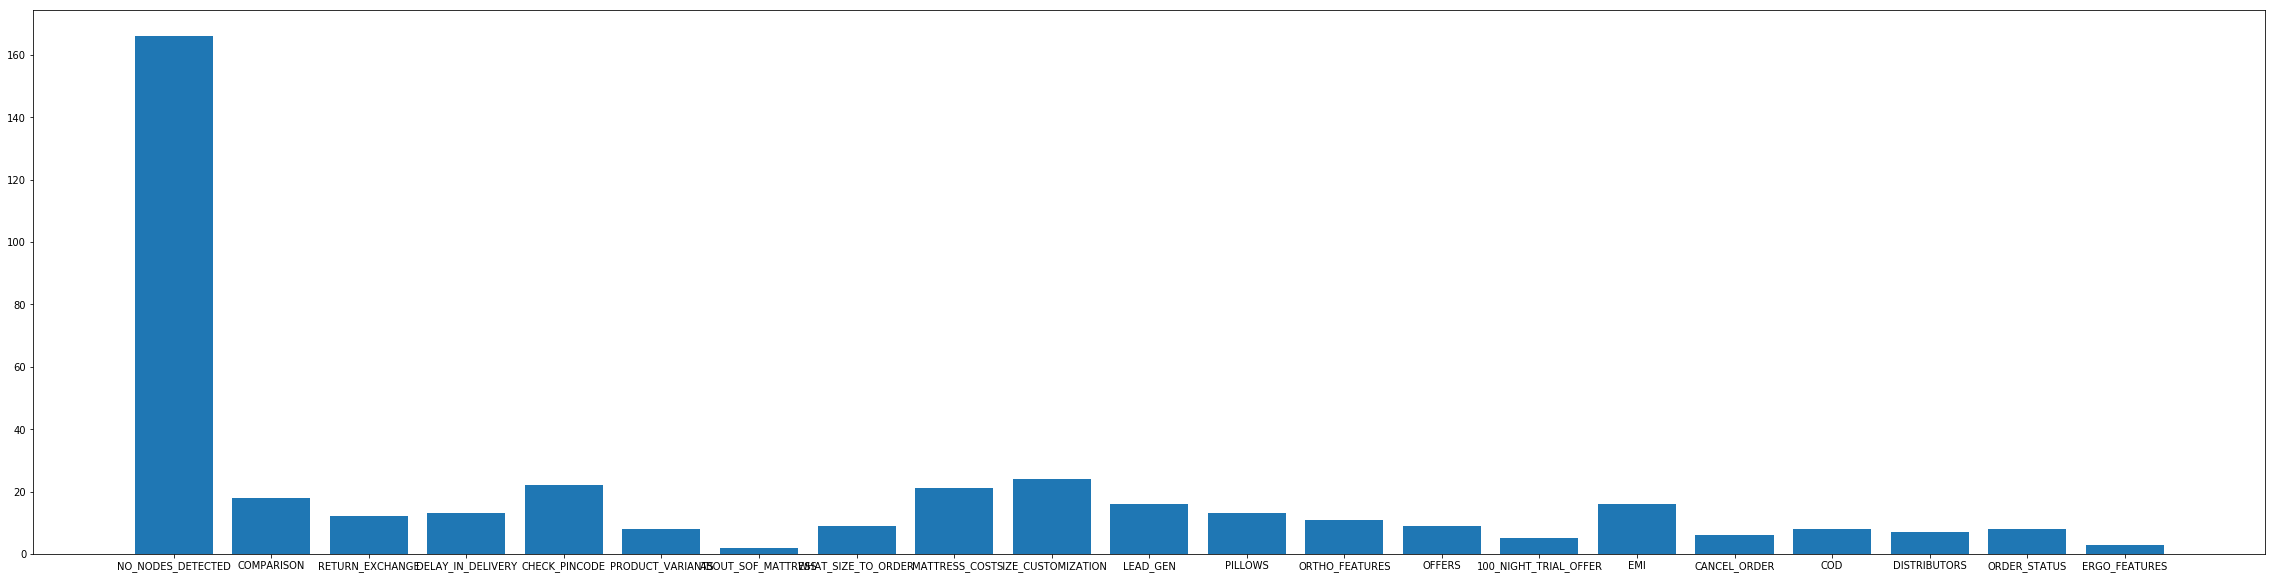

In [10]:
# Class distribution in test set
D = Counter(df_test['label'])
plt.rcParams["figure.figsize"] = (40,10)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [11]:
# OOV words/Domain specific words and Spelling mistakes in train set
with open("/home/ubuntu/gaurav/.fastai/models/wt103-fwd/itos_wt103.pkl", "rb") as input_file:
    wiki_itos = pickle.load(input_file)
tok = SpacyTokenizer('en')
oov_tokens = []
for index, row in df_train.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t not in wiki_itos:
            oov_tokens.append(t)
oov_tokens = list(set(oov_tokens))
print(oov_tokens)

['customise', 'availble', 'paisa', '100-night', 'ergonomic', 'ortho', 'ergo', 'callback', "n't", 'showrooms', 'customisation', 'backache', 'orthopaedic', 'mrp', 'pincode', ' ']


In [12]:
# SOF mattress is also a domain specific word 
'sof' in wiki_itos

True

In [13]:
# OOV words/Domain specific words and Spelling mistakes in test set
with open("/home/ubuntu/gaurav/.fastai/models/wt103-fwd/itos_wt103.pkl", "rb") as input_file:
    wiki_itos = pickle.load(input_file)
tok = SpacyTokenizer('en')
oov_tokens = []
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t not in wiki_itos:
            oov_tokens.append(t)
oov_tokens = list(set(oov_tokens))
print(oov_tokens)

['20%off', 'matterss', '641109', 'ssup', 'nipani', '72×72', 'deliverable', 'pincode', 'yadgir', 'thatz', '46.5', 'indain', 'x36size', '75×70', 'emidetail', 'jagdalpur', 'offen', 'knw', 'toh', 'deliverd', 'chhattisgarh', '500060', 'virudhunagar', 'kariyapatti', '591237', 'orderd', 'preorderdiscoutgetforemipurchase', 'pls', 'pain.currently', '98765', 'sondo', 'dilsukhnagar', '5x6', 'catlouge', '7021645199', '500003', '12000', 'ordr', 'matresses', 'vijayawada', 'abhle', 'seep4immunity', 'width6', 'mujhr', 'paryankar', "'ve", '’s', '22,989', 'chaiye', 'bulandshahr', "'m", 'uncompressed', 'company.you', 'egro', 'diffrent', '500018', '500065', 'jst', 'pocketed', 'simulatenenous', 'wats', '😳', 'orgo', '78.72', 'aaronnyzil.dsouza401@gmail.com', 'avilable', 'bareilly', 'whatsapp', 'ergo', 'showrooms', 'shoft', 'hassle', '.you', '8inch', '६', 'matteress', '4ftx6', 'verities', '×57', 'pocess', 'recieved', '4×', '7x6', 'lyk', 'ghaziabad', '505002', 'chahiye', 'ortho', 'postpaid', 'mattreses', 'ths

In [14]:
# Few examples of code-mixed sentences in test set
hinglish_words = ['dubal', 'kya', 'mujhr', 'chahiye']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in hinglish_words:
            print(row['sentence'])
            break

Si dubal bed me
8 inch chaiye mujhr
Finesse facility avilable hai kya
Mere ko 4× 7 ka metres chahiye


In [15]:
# Few examples of spelling mistakes in test set
spelling_mistakes = ['delivere', 'mattres', 'orfer', 'avilable', 'pliiows', 'surly', 'wany', 'offen', 'deliverd', 'kbow', 'simulatenenous']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in spelling_mistakes:
            print(row['sentence'])
            break

Don't kbow the size of my bed
I wany to custimize the mattress is it possible
Finesse facility avilable hai kya
Need pliiows
my order no is 15487. i have ordered two pillows is there any issue for simulatenenous delivery of all products
can i orderd SOF mattres from pakistan
I am from Odisha State can the mattress delivere
If we orfer by emi.. can we return it
Dear team I need to know which type bed I've to take egro or otho I sit and work a lot hence I get back pain offen and because of my hard bed I feel shoulder pain when i sleep once side. Can you suggest which one is best for me
S surly
when will my order deliverd


In [16]:
# Few examples of slangs in test set
slang_words = ['ssup', 'lyk', 'kand', 'jst', 'pls', 'wats', 'plz', 'v', 'u']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in slang_words:
            print(row['sentence'])
            break

I don't know about mattress pls you help me my age 28 old. Ergo is good or ortho is good
can i whatsapp u there
Wats ortho and vertho
I have a queen size bed. so pls assist me to buy a mattress
Nothing mentioned such thing lyk custom
Can u deliver to mumbai
Do u have delivery at kerala
If size is problem, v can return it
Jst need information on thsi
before I buy it only 12000 rs but u don't send me and u upgrade 2000
Do u have delivery at Kerala
Plz send us details on my whatsapp no 7021645199
Pls explain about verities like that  ergo  etc
Can u mail me the catlouge on my mail id
r u guys delivering in lockdown
Can we use on kand
U have outlets  in
How will u deliver with this LockDown in place ?
Do u have aCoimbatore outlet to check which is suitable. Our present Mattress size is 6’4” x 5’ x 9”
Ssup?
Wats the cost for mattress


In [17]:
# Examples of grammatically incorrect sentences
print('Nothing mentioned such thing lyk custom')
print('If this not fit to my bed then what ?')
print("How to Cancel my Order because it's too Delay, ")
print("can't able to buy")
print("before I buy it only 12000 rs but u don't send me and u upgrade 2000")

Nothing mentioned such thing lyk custom
If this not fit to my bed then what ?
How to Cancel my Order because it's too Delay, 
can't able to buy
before I buy it only 12000 rs but u don't send me and u upgrade 2000


In [18]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  28
Avg no. of tokens:  4.448170731707317
Median of no. of tokens:  4.0


In [19]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  53
Avg no. of tokens:  6.607052896725441
Median of no. of tokens:  5


In [5]:
# are there any queries in other than latin script in train set
def is_english(s: str) -> bool:
    if len(re.findall(u'[\u0900-\u097F]', s)):
        return False
    return True

for index, row in df_train.iterrows():
    if not is_english(row['sentence']):
        print(row['sentence'])

In [6]:
# are there any queries in other than latin script in test set
def is_english(s: str) -> bool:
    if len(re.findall(u'[\u0900-\u097F]', s)):
        return False
    return True

for index, row in df_test.iterrows():
    if not is_english(row['sentence']):
        print(row['sentence'])

6/६
